In [1]:
import numpy as np

In [2]:
A = np.array([[0,1],[1,1],[1,0]])
A

array([[0, 1],
       [1, 1],
       [1, 0]])

In [3]:
u, s, vt = np.linalg.svd(A, full_matrices=True)
print(u.shape, s.shape, vt.shape)

(3, 3) (2,) (2, 2)


In [4]:
u

array([[-4.08248290e-01,  7.07106781e-01,  5.77350269e-01],
       [-8.16496581e-01,  7.45552182e-17, -5.77350269e-01],
       [-4.08248290e-01, -7.07106781e-01,  5.77350269e-01]])

In [5]:
s

array([1.73205081, 1.        ])

In [6]:
vt.T

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [7]:
np.allclose(A, np.dot(u[:,:2]*s, vt)) #np.allclose() 在容忍范围内考察两矩阵是否相等 由u s vt 恢复矩阵A

True

In [8]:
np.dot(u[:,:2]*s, vt)

array([[ 1.02120423e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -2.11898069e-16]])

In [9]:
#由于svd函数对s的输出做了简化，省略了0，需要在此做一个还原。
s_ = np.zeros((3,2))
for i in range(2):
    s_[i][i] = s[i]

s_ 

array([[1.73205081, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

In [10]:
np.dot(np.dot(u, s_), vt)

array([[ 1.02120423e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -2.11898069e-16]])

In [11]:
import numpy as np
import os
from PIL import Image
from tqdm import tqdm

In [12]:
# 定义恢复函数，由分解后的矩阵恢复到原矩阵
def restore(u, s, v, K): 
    '''
    u:左奇异矩阵
    v:右奇异矩阵
    s:奇异值矩阵
    K:奇异值个数
    '''
    m, n = len(u), len(v[0])
    a = np.zeros((m, n))
    for k in range(K):
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        # 前k个奇异值的加总
        a += s[k] * np.dot(uk, vk)   
    a = a.clip(0, 255)
    return np.rint(a).astype('uint8')

A = np.array(Image.open("./NULL.jpg", 'r'))
# 对RGB图像进行奇异值分解
u_r, s_r, v_r = np.linalg.svd(A[:, :, 0])    #第一列的SVD分解
u_g, s_g, v_g = np.linalg.svd(A[:, :, 1])
u_b, s_b, v_b = np.linalg.svd(A[:, :, 2])

# 使用前50个奇异值
K = 50 
output_path = r'./svd_pic'
# 
for k in tqdm(range(1, K+1)):
    R = restore(u_r, s_r, v_r, k)
    G = restore(u_g, s_g, v_g, k)
    B = restore(u_b, s_b, v_b, k)
    I = np.stack((R, G, B), axis=2)   #RGB各中元素依次列堆叠
    Image.fromarray(I).save('%s\\svd_%d.jpg' % (output_path, k)) #输出位置及各式引用

100%|███████████████████████████████████████████| 50/50 [00:19<00:00,  2.62it/s]


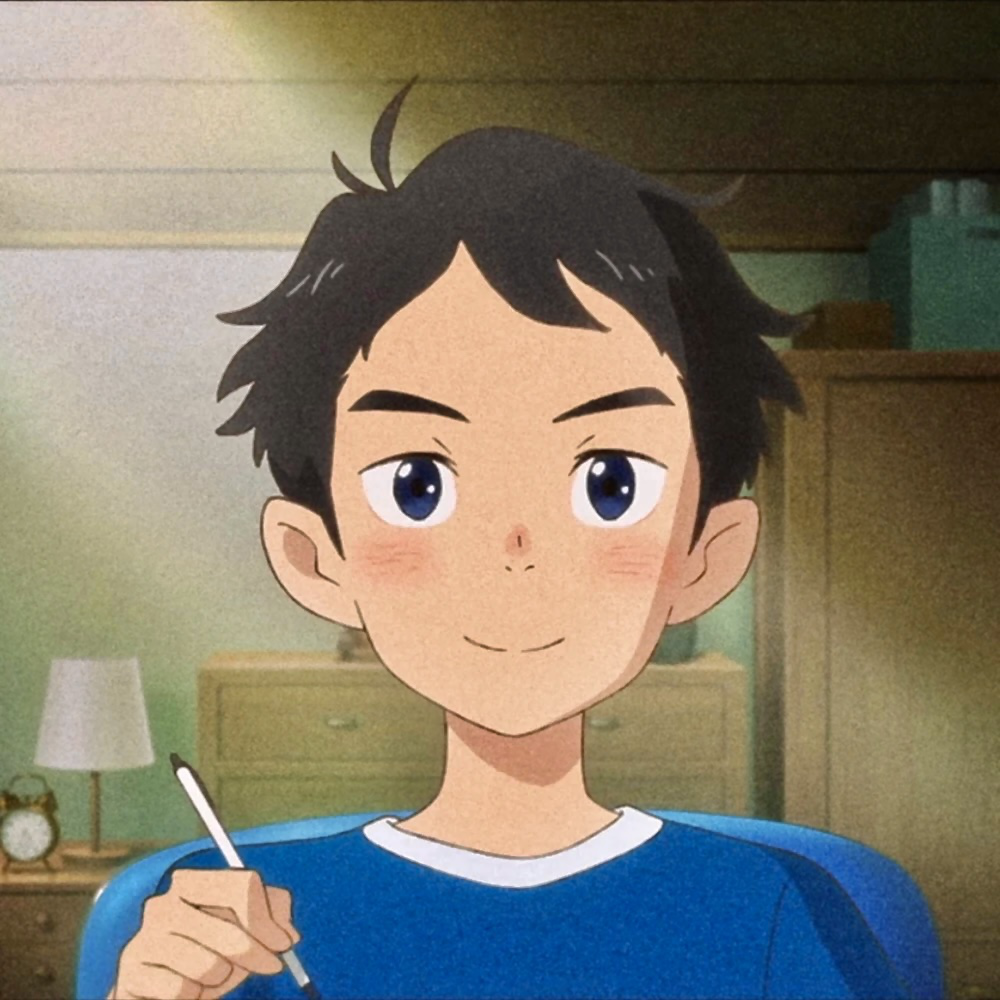

In [13]:
Image.open("./NULL.jpg", 'r')

In [14]:
np.array(Image.open("./NULL.jpg", 'r'))

array([[[ 66,  56,  55],
        [ 65,  55,  53],
        [ 63,  53,  51],
        ...,
        [ 18,  16,   4],
        [ 18,  16,   4],
        [ 18,  16,   4]],

       [[165, 155, 154],
        [164, 154, 153],
        [163, 152, 150],
        ...,
        [ 22,  20,   8],
        [ 22,  20,   8],
        [ 22,  20,   8]],

       [[215, 203, 203],
        [214, 202, 202],
        [212, 200, 200],
        ...,
        [ 27,  23,  12],
        [ 27,  23,  12],
        [ 26,  22,  11]],

       ...,

       [[ 58,  41,  23],
        [ 61,  44,  26],
        [ 65,  48,  30],
        ...,
        [ 53,  45,  24],
        [ 53,  45,  24],
        [ 53,  45,  24]],

       [[ 59,  42,  24],
        [ 61,  44,  26],
        [ 63,  46,  28],
        ...,
        [ 48,  40,  21],
        [ 47,  39,  20],
        [ 47,  39,  20]],

       [[ 60,  43,  25],
        [ 61,  44,  26],
        [ 60,  43,  25],
        ...,
        [ 41,  34,  15],
        [ 42,  35,  16],
        [ 42,  35,  16]]

In [15]:
np.array(Image.open("./NULL.jpg", 'r'))[0,:,0]

array([66, 65, 63, 63, 62, 62, 62, 65, 76, 77, 78, 77, 75, 72, 72, 73, 70,
       69, 67, 65, 63, 64, 65, 67, 64, 65, 66, 67, 68, 66, 63, 60, 62, 68,
       72, 69, 65, 64, 68, 71, 73, 72, 74, 78, 80, 77, 74, 72, 73, 73, 75,
       76, 77, 77, 76, 75, 71, 72, 74, 74, 72, 74, 78, 79, 75, 76, 77, 78,
       78, 75, 72, 69, 68, 69, 66, 64, 69, 78, 78, 71, 68, 69, 71, 69, 67,
       65, 66, 68, 70, 71, 71, 70, 69, 68, 68, 68, 66, 67, 67, 68, 71, 73,
       74, 73, 67, 67, 73, 78, 76, 73, 72, 72, 73, 71, 67, 65, 69, 76, 77,
       73, 72, 72, 72, 70, 69, 70, 73, 75, 71, 71, 69, 66, 68, 69, 70, 73,
       77, 77, 77, 75, 73, 72, 73, 74, 77, 78, 78, 78, 80, 80, 81, 82, 83,
       82, 81, 77, 75, 76, 80, 81, 84, 82, 78, 76, 74, 73, 73, 73, 74, 80,
       82, 78, 76, 78, 81, 80, 79, 78, 76, 77, 81, 85, 85, 82, 75, 74, 72,
       73, 78, 82, 84, 87, 89, 90, 89, 88, 87, 88, 90, 93, 92, 93, 97, 97,
       93, 91, 93, 92, 95, 95, 95, 95, 95, 95, 95, 91, 89, 88, 87, 87, 86,
       84, 82, 81, 85, 84